# Classify Handwritten Digits with Convolutional Neural Networks (CNNs)
By B Nord (2018 Nov 09)  
Minor updates by G Hosseinzadeh (2025 May 19)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import keras

## Prepare the Data

### Download the data
Load the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) data set included in Keras. This consists of handwritten digits from 0-9 that we will try to identify with a CNN.

In [11]:
# uncomment the following line if the load_data function crashes with SSL: CERTIFICATE_VERIFY_FAILED
# !curl https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz -o ~/.keras/datasets/mnist.npz

(x_train_temp, y_train_temp), (x_test_temp, y_test_temp) = keras.datasets.mnist.load_data()

### **Look** at the data
Check whether the shapes of 'data' and 'label' (for train and test, respectively) match. If they don't now, Keras/TF will kindly yell at you later. (You always do this so that you **know** what the structure is!)

In [13]:
print("Train Data Shape:", x_train_temp.shape)
print("Test Data Shape:", x_test_temp.shape)
print("Train Label Shape:", y_train_temp.shape)
print("Test Label Shape:", y_test_temp.shape)

Train Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)
Train Label Shape: (60000,)
Test Label Shape: (10000,)


Print out an example image and label from in the training set. Can you see the pattern of the number? Plot the first two images in the set.


5
0


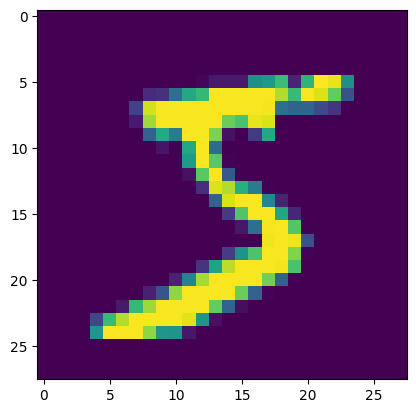

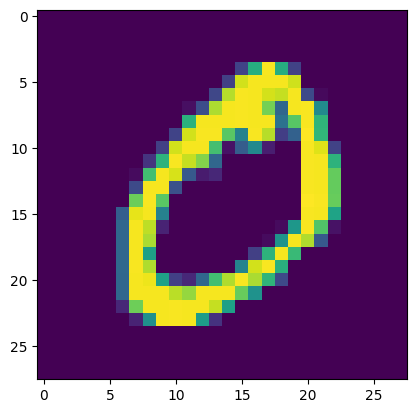

In [14]:
print(y_train_temp[0])
print(y_train_temp[1])

# plot
plt.imshow(x_train_temp[0])
plt.show()
plt.imshow(x_train_temp[1])
plt.show()


### Prepare the data

Data often need to be reshaped and normalized for ingestion into the neural network.
Add an extra (empty) dimension to the end of the images (see `np.expand_dims`).
Normalize the pixel values to be between 0 and 1 for the network.



In [16]:
x_train = np.expand_dims(x_train_temp, axis = -1)
x_test = np.expand_dims(x_test_temp, axis = -1)

#Normarization
x_train_norm = x_train / x_train.max()
x_test_norm = x_train / x_test.max()

Apply *one-hot encoding* to the labels.


1.   The current encoding provides a literal label. For example, the label for "3"  is `3`.
2.   One-hot encoding places a "1" in an array at the appropriate location for that datum. For example, the label "3" becomes `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.

This increases the efficiency of the matrix algebra during network training and evaluation.




In [17]:
y_train = keras.utils.to_categorical(y_train_temp, num_classes = 10)
y_test = keras.utils.to_categorical(y_train_temp, num_classes = 10)

# print
print(y_train)
print(y_test)


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## Design Neural Network Architecture!

### Select model format and add layers to the model sequentially
Create a sequential model with the following layers:
1. input layer with the shape of one of the input images
2. 2D convolution layer with 32 filters, a kernel size of (3, 3), and a ReLU activation function
3. dropout layer with a rate of 0.25
4. flattening layer
5. fully connected (dense) layer with a neuron for each convolution filter and a ReLU activation function
6. dropout layer with a rate of 0.5
7. output fully connected (dense) layer with a neuron for each classification and a softmax activation function

Print out the model summary table.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# print
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       692,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,906 (2.64 MB)

 Trainable params: 692,906 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

Select three key options
1.   **optimizer**: the method for optimizing the weights. "Stochastic Gradient Descent (SGD)" is the canonical method.
2.   **loss** function: the form of the function to encode the difference between the data's true label and the predict label.
3.   **metric**: the function by which the model is evaluated.

In [21]:
model.compile(optimizer = keras.optimizers.SGD(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Fit (read: Train) the model
Use 5 epochs (batches) of 32 images and a validation split of 80%.

In [23]:
history = model.fit(x_train_norm,
                    y_train,
                    epochs = 5,
                    batch_size = 32,
                    validation_split = 0.8)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.4393 - loss: 1.6896 - val_accuracy: 0.8595 - val_loss: 0.5426
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.7585 - loss: 0.7802 - val_accuracy: 0.8919 - val_loss: 0.4009
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7975 - loss: 0.6563 - val_accuracy: 0.8964 - val_loss: 0.3579
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.8108 - loss: 0.6133 - val_accuracy: 0.9046 - val_loss: 0.3385
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8191 - loss: 0.5764 - val_accuracy: 0.9100 - val_loss: 0.3135


## Diagnostics!


#### Evaluate overall model efficacy

Evaluate model on training and test data and compare. This provides summary values that are equivalent to the final value in the accuracy plot below.  Don't forget to undo the one-hot encoding for the predicted labels *(hint: `np.argmax`)*.

In [32]:
# Evaluate model
acc_train_loss, acc_train_accuracy = model.evaluate(x_train_norm, y_train, verbose = 0)
acc_test_loss, acc_test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 0)

# print
print(f'Train accuracy = {acc_train_accuracy:.1%}')
print(f'Train loss = {acc_train_loss:.1%}')
print(f'Test accuracy = {acc_test_accuracy:.1%}')
print(f'Test loss = {acc_test_loss:.1%}')

Train accuracy = 91.3%
Train loss = 30.4%
Test accuracy = 91.3%
Test loss = 30.4%


#### Plot accuracy and loss as a function of epochs (equivalently training time)
This information is stored in the `history` object you defined earlier.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step


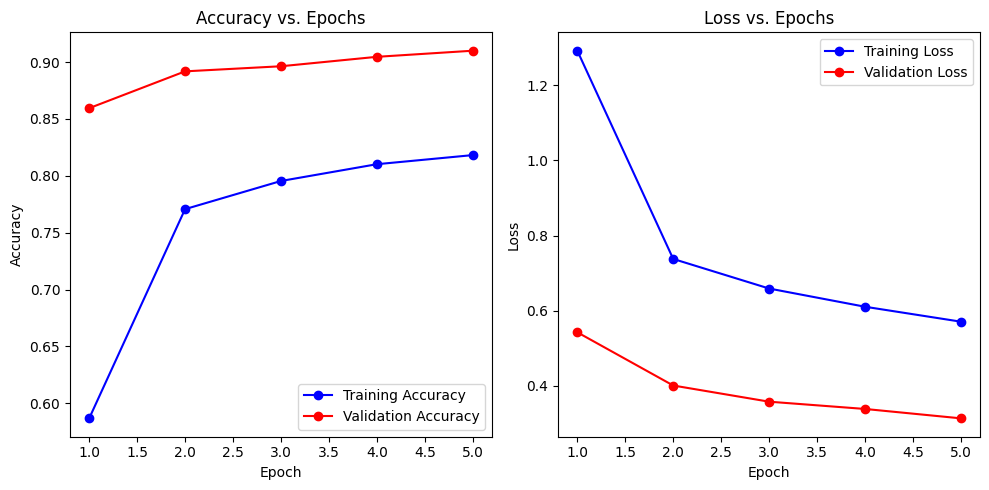

In [35]:
# Predict probabilities
pred_probs = model.predict(x_test_norm)

# Convert probabilities to predicted class
pred_labels = np.argmax(pred_probs, axis=1)

# Convert true labels from one-hot encoding to integer class labels
true_labels = np.argmax(y_test, axis=1)

# Retrieve training and validation accuracy and loss from training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plot the loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### Confusion Matrix
Plot a confusion matrix for the test data.

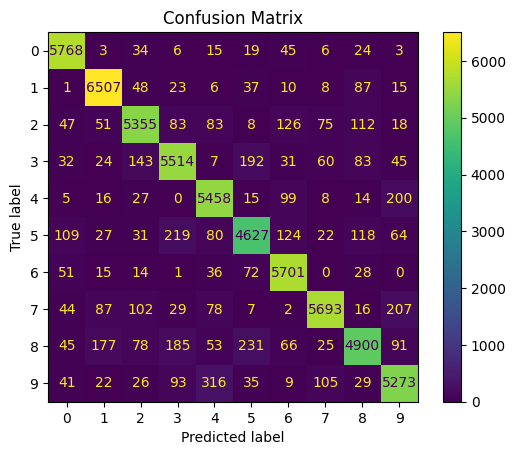

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, pred_labels)
cm_disp = ConfusionMatrixDisplay(confusion_matrix =cm,
                                 display_labels = range(10))
cm_disp.plot(cmap = 'viridis')
plt.title('Confusion Matrix')
plt.show()